# House price prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('house_price_prediction.csv')

In [3]:
df.head(5)

,X_0,avg_income,avg_area_house_age,avg_area_num_rooms,avg_population,price
0,1,79545.45857,5.682861,7.009188,23086.80050,1.059034e+06
1,1,79248.64245,6.002900,6.730821,40173.07217,1.505891e+06
2,1,61287.06718,5.865890,8.512727,36882.15940,1.058988e+06
3,1,63345.24005,7.188236,5.586729,34310.24283,1.260617e+06
4,1,59982.19723,5.040555,7.839388,26354.10947,6.309435e+05


In [4]:
df.describe()

,X_0,avg_income,avg_area_house_age,avg_area_num_rooms,avg_population,price
count,5012.0,5009.000000,5010.000000,5011.000000,5009.000000,5.012000e+03
mean,1.0,68577.804938,5.977508,6.987906,36155.832559,1.231947e+06
std,0.0,10661.033166,0.991472,1.006453,9928.823462,3.529525e+05
min,1.0,17796.631190,2.644304,3.236194,172.610686,1.593866e+04
25%,1.0,61482.244790,5.322274,6.298437,29403.512060,9.981375e+05
50%,1.0,68814.925610,5.969828,7.003188,36183.287800,1.232983e+06
75%,1.0,75780.621120,6.652302,7.667048,42841.741620,1.471756e+06
max,1.0,107701.748400,9.519088,10.759588,69621.713380,2.469066e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   X_0                 5012 non-null   int64  
 1   avg_income          5009 non-null   float64
 2   avg_area_house_age  5010 non-null   float64
 3   avg_area_num_rooms  5011 non-null   float64
 4   avg_population      5009 non-null   float64
 5   price               5012 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 235.1 KB


### Some rows of features contain null values. This may affect the performance of the model. Therefore we drop the samples containing null values.

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5005 entries, 0 to 5011
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   X_0                 5005 non-null   int64  
 1   avg_income          5005 non-null   float64
 2   avg_area_house_age  5005 non-null   float64
 3   avg_area_num_rooms  5005 non-null   float64
 4   avg_population      5005 non-null   float64
 5   price               5005 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 273.7 KB


## Feature scaling
### Scaling down features to the same range for better performance and reduce computations  using mean square normalization.

In [8]:
scaled_df = (df - df.mean()) / df.std()

## Data visualization

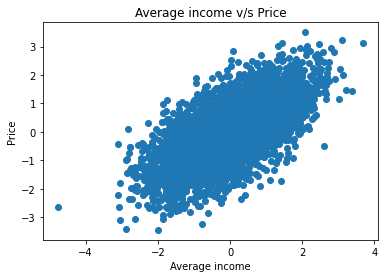

In [9]:
plt.scatter(scaled_df['avg_income'],scaled_df['price'])
plt.xlabel("Average income")
plt.ylabel("Price")
plt.title("Average income v/s Price")
plt.show()

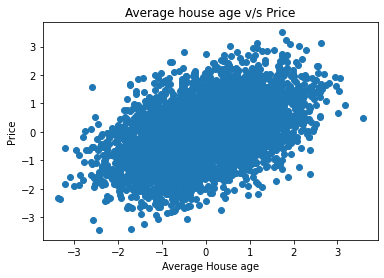

In [10]:
plt.scatter(scaled_df['avg_area_house_age'],scaled_df['price'])
plt.xlabel("Average House age")
plt.ylabel("Price")
plt.title("Average house age v/s Price")
plt.show()

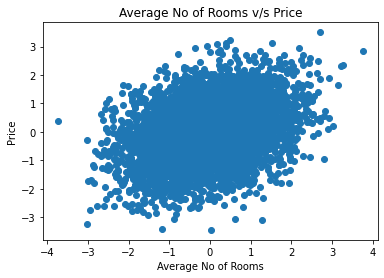

In [11]:
plt.scatter(scaled_df['avg_area_num_rooms'],scaled_df['price'])
plt.xlabel("Average No of Rooms")
plt.ylabel("Price")
plt.title("Average No of Rooms v/s Price")
plt.show()

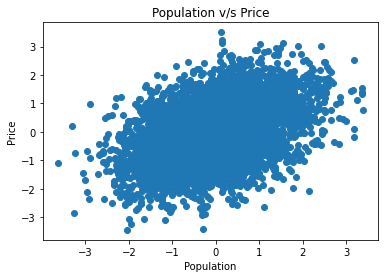

In [12]:
plt.scatter(scaled_df['avg_population'],scaled_df['price'])
plt.xlabel("Population")
plt.ylabel("Price")
plt.title("Population v/s Price")
plt.show()

## Train and Test Split

In [13]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df.iloc[:,:-1],scaled_df['price'], test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3753, 5) (1252, 5) (3753,) (1252,)


In [14]:
X_train['X_0']=1
X_train

,X_0,avg_income,avg_area_house_age,avg_area_num_rooms,avg_population
3368,1,-0.746057,-0.508205,-0.371760,-0.277039
543,1,1.163207,-0.510687,-0.074836,1.196235
1698,1,-0.727145,0.409527,-0.728249,0.073616
1947,1,0.145402,-0.933815,-2.209437,-1.420263
979,1,-1.052549,1.387438,0.107789,-1.420427
...,...,...,...,...,...
484,1,0.381340,-1.548299,0.912295,-0.472584
1408,1,0.936412,-0.073350,-0.772260,-0.645008
3656,1,-0.719396,-0.640684,-0.221124,-1.083541
428,1,1.036970,-1.295509,-0.696865,-0.455636


In [15]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [16]:
n= 5
t = np.zeros(n)
m = len(X_train)
alpha = 0.2
epochs = 50
cost = np.array([])
theta_0 = np.array([])
theta_1 = np.array([])
theta_2 = np.array([])
theta_3 = np.array([])
theta_4 = np.array([])

In [17]:
for epoch in range(0,epochs):
    for j in range(n):
        for i in range(m):
            t[j] = t[j] - (alpha/m)*((sum(X_train[i]*t)-y_train[i])*X_train[i][j])
            c = ((sum(X_train[i]*t)-y_train[i])**2)/(2*m)
    print(c)
    cost = np.append(cost,c,axis = None)
    theta_0 = np.append(theta_0,t[0],axis = None) 
    theta_1 = np.append(theta_1,t[1],axis = None)
    theta_2 = np.append(theta_2,t[2],axis = None)
    theta_3 = np.append(theta_3,t[3],axis = None)
    theta_4 = np.append(theta_4,t[4],axis = None)

6.95118129020626e-05
4.866547102646157e-05
3.42310354987216e-05
2.421119590812957e-05
1.723523182965825e-05
1.2361681369207335e-05
8.943281193986565e-06
6.534507437682103e-06
4.828263213552556e-06
3.612510081164957e-06
2.7405486271729766e-06
2.110642062780457e-06
1.6520369136255743e-06
1.3153651712616691e-06
1.0660485773212995e-06
8.79760955495118e-07
7.393022479822338e-07
6.324416152424251e-07
5.504263431593546e-07
4.869486958144263e-07
4.3742815481357615e-07
3.9851120316030687e-07
3.677214438851644e-07
3.4321383715711774e-07
3.236012354987951e-07
3.078312752824116e-07
2.950984671148786e-07
2.8478099190311673e-07
2.763949198719572e-07
2.695607829178985e-07
2.63978958948643e-07
2.5941138441538984e-07
2.556678448786734e-07
2.525956038626372e-07
2.500714865712483e-07
2.479957847705356e-07
2.462875249647719e-07
2.44880766426449e-07
2.4372168421723614e-07
2.4276625580472436e-07
2.4197841568082885e-07
2.413285756985513e-07
2.4079243327290196e-07
2.40350007662155e-07
2.399848580350942e-07
2.

In [18]:
t

array([0.00255865, 0.65270941, 0.46453695, 0.34432968, 0.42653058])

In [19]:
Epochs = list(range(epochs))

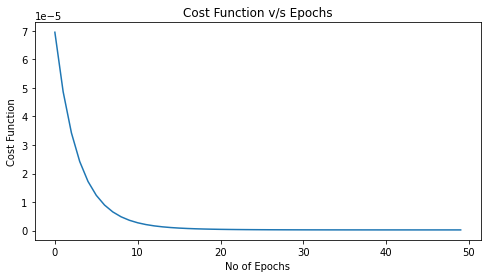

In [20]:
plt.figure(figsize=(8,4))
plt.plot(Epochs,cost)
plt.xlabel("No of Epochs")
plt.ylabel("Cost Function")
plt.title("Cost Function v/s Epochs")
plt.show()

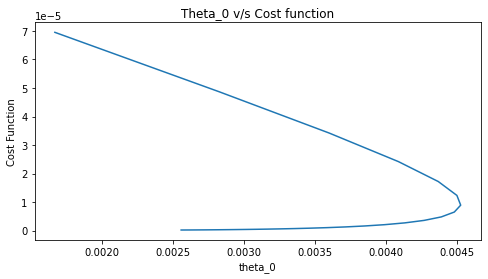

In [21]:
plt.figure(figsize=(8,4))
plt.plot(theta_0,cost)
plt.xlabel("theta_0")
plt.ylabel("Cost Function")
plt.title("Theta_0 v/s Cost function")
plt.show()

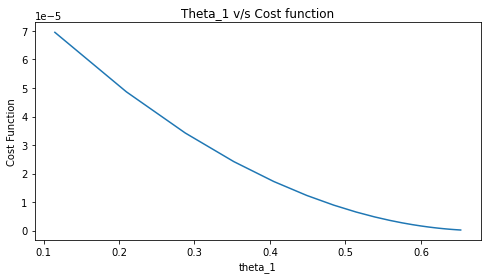

In [22]:
plt.figure(figsize=(8,4))
plt.plot(theta_1,cost)
plt.xlabel("theta_1")
plt.ylabel("Cost Function")
plt.title("Theta_1 v/s Cost function")
plt.show()

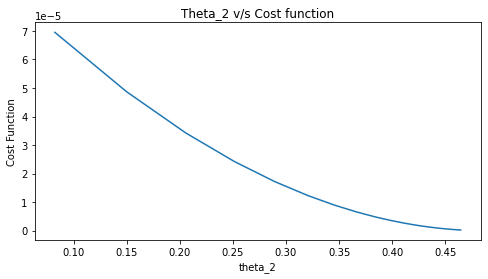

In [23]:
plt.figure(figsize=(8,4))
plt.plot(theta_2,cost)
plt.xlabel("theta_2")
plt.ylabel("Cost Function")
plt.title("Theta_2 v/s Cost function")
plt.show()

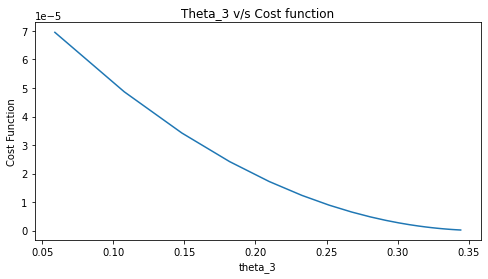

In [24]:
plt.figure(figsize=(8,4))
plt.plot(theta_3,cost)
plt.xlabel("theta_3")
plt.ylabel("Cost Function")
plt.title("Theta_3 v/s Cost function")
plt.show()

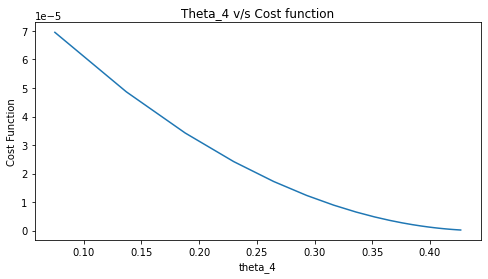

In [25]:
plt.figure(figsize=(8,4))
plt.plot(theta_4,cost)
plt.xlabel("theta_4")
plt.ylabel("Cost Function")
plt.title("Theta_4 v/s Cost function")
plt.show()

## Predictions

In [28]:
#### Sample implementations of house price prediction model
avg_income = float(input("Enter your average income rs:"))
avg_area_house_age = float(input("Enter expected area of house in sqft:"))
avg_area_num_rooms = float(input("Enter expected no of rooms :"))
avg_population = float(input("Enter average population in that area :"))

new = sum(t*[1,avg_income,avg_area_house_age,avg_area_num_rooms,avg_population])
print("The predicted house price is rs.","{:.2f}".format(new),"/-")

Enter your average income rs:30000
Enter expected area of house in sqft:200
Enter expected no of rooms :4
Enter average population in that area :500000
The predicted house price is rs. 232940.86 /-
